<a href="https://colab.research.google.com/github/Tejesvani/MallCustomer_Segmentation/blob/master/Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/Tejesvani/ai_coe/master/Mall_Customers.csv?token=AK44CAZ7HVKYPYXTQVECLRK5BGWGY")
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
5             6  Female   22                  17                      76
6             7  Female   35                  18                       6
7             8  Female   23                  18                      94
8             9    Male   64                  19                       3
9            10  Female   30                  19                      72
10           11    Male   67                  19                      14
11           12  Female   35                  19                      99
12           13  Female   58                  20   

In [ ]:
df=df.rename(columns={"Annual Income (k$)":"Annual_Income","Spending Score (1-100)":'Spending_Score'})
df.head(10)

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
print(df.info())
print("#############################################################")
print(df.describe())
print("#############################################################")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID        200 non-null int64
Gender            200 non-null object
Age               200 non-null int64
Annual_Income     200 non-null int64
Spending_Score    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
#############################################################
       CustomerID         Age  Annual_Income  Spending_Score
count  200.000000  200.000000     200.000000      200.000000
mean   100.500000   38.850000      60.560000       50.200000
std     57.879185   13.969007      26.264721       25.823522
min      1.000000   18.000000      15.000000        1.000000
25%     50.750000   28.750000      41.500000       34.750000
50%    100.500000   36.000000      61.500000       50.000000
75%    150.250000   49.000000      78.000000       73.000000
max    200.000000   70.000000     137.000000       99.000000
############################################

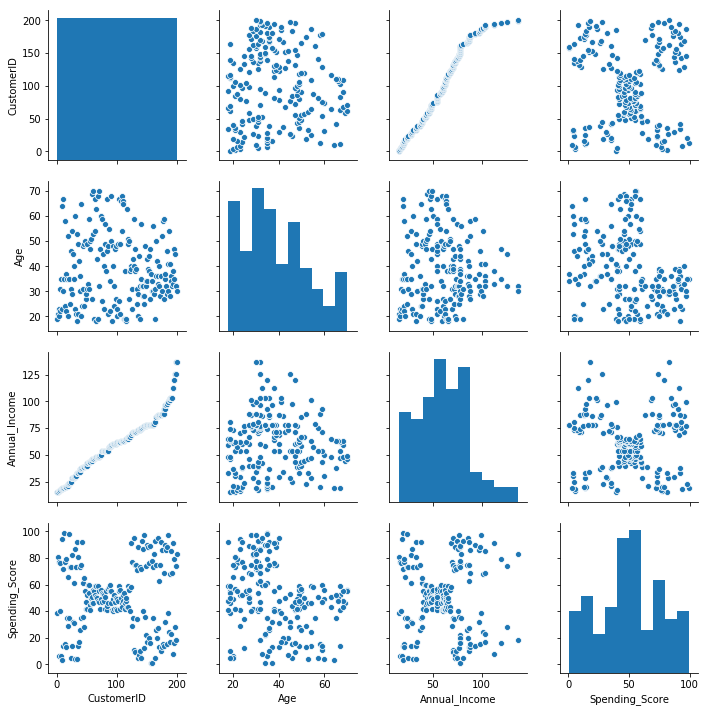

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

,CustomerID,Age,Annual_Income,Spending_Score
CustomerID,1.000000,-0.010502,0.992995,0.023004
Age,-0.010502,1.000000,0.015274,-0.328724
Annual_Income,0.992995,0.015274,1.000000,0.021951
Spending_Score,0.023004,-0.328724,0.021951,1.000000


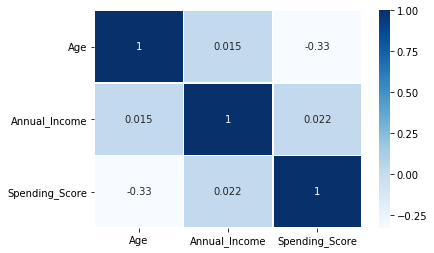

In [ ]:
hm=sns.heatmap(df.iloc[:,1:5].corr(), annot = True, linewidths=.5, cmap='Blues')
hm

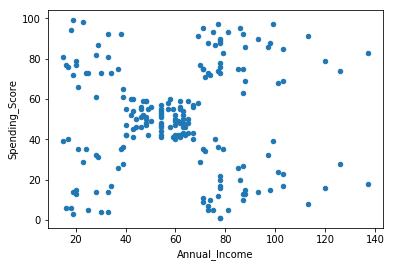

In [ ]:
df.plot.scatter(x="Annual_Income",y="Spending_Score")

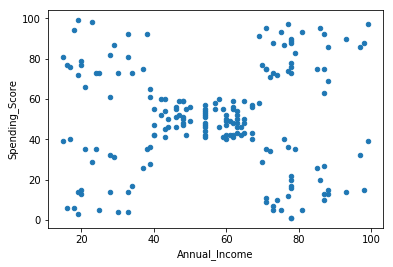

In [ ]:
df=df.drop(df.index[df.Annual_Income > 100],axis=0)
df.plot.scatter(x="Annual_Income",y="Spending_Score")

In [ ]:
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


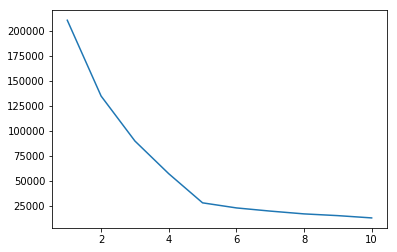

In [ ]:
x=df.iloc[:,[3,4]].values
clusters=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(x)
  clusters.append(kmeans.inertia_)
  
plt.plot(range(1,11),clusters) 

In [ ]:
kmeans=KMeans(n_clusters=5)
y=kmeans.fit_predict(x)
print(y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1]


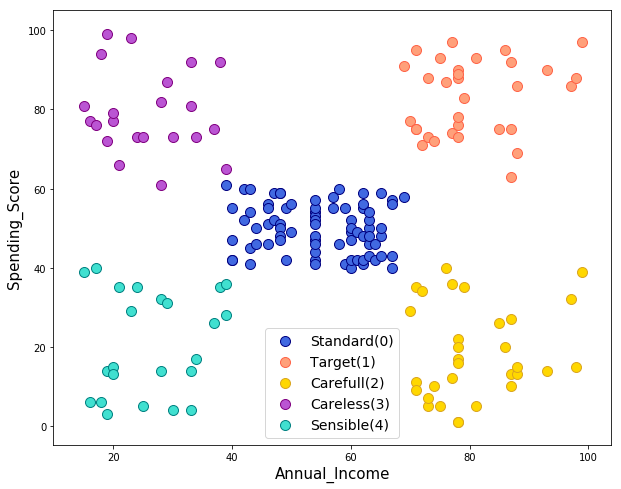

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x[y == 0, 0], x[y == 0, 1], s = 100, c = 'royalblue', edgecolors = 'navy', label = 'Standard(0)')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s = 100, c = 'lightsalmon', edgecolors = 'tomato', label = 'Target(1)')
plt.scatter(x[y == 2, 0], x[y == 2, 1], s = 100, c = 'gold', edgecolors = 'goldenrod', label = 'Carefull(2)')
plt.scatter(x[y == 3, 0], x[y == 3, 1], s = 100, c = 'mediumorchid', edgecolors = 'purple', label = 'Careless(3)')
plt.scatter(x[y == 4, 0], x[y == 4, 1], s = 100, c = 'turquoise', edgecolors = 'teal', label = 'Sensible(4)')
plt.xlabel("Annual_Income",fontsize=15)
plt.ylabel("Spending_Score",fontsize=15)
plt.legend(fontsize = 14)
plt.show()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_dtc=dtc.predict(x_test)

print(accuracy_score(y_dtc,y_test))

0.9736842105263158


In [ ]:
print(classification_report(y_test,y_dtc))

print()
accuracies = cross_val_score(estimator = dtc, X = x_train, y = y_train, cv = 10)
print('Mean: '+ str(accuracies.mean()))
print('Std: '+str(accuracies.std()))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         7
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         4

    accuracy                           0.97        38
   macro avg       0.99      0.96      0.97        38
weighted avg       0.98      0.97      0.97        38


Mean: 0.9739495798319329
Std: 0.04154355325817907
